In [1]:
#age (numeric)
#job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
#marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
#education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
#default: has credit in default? (categorical: "no","yes","unknown")
#housing: has housing loan? (categorical: "no","yes","unknown")
#loan: has personal loan? (categorical: "no","yes","unknown")

## related with the last contact of the current campaign:
#contact: contact communication type (categorical: "cellular","telephone")
#month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
#dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

## other attributes:
#campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#previous: number of contacts performed before this campaign and for this client (numeric)
#poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## social and economic context attributes
#emp.var.rate: employment variation rate - quarterly indicator (numeric)
#cons.price.idx: consumer price index - monthly indicator (numeric)
#cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#euribor3m: euribor 3 month rate - daily indicator (numeric)
#nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
#y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv("Banking_Marketing.csv")

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,104.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41195,2.0,housemaid,married,Basic,unknown,no,n,NaN,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41196,3.0,admin.,single,university.degree,unknown,yes,y,NaN,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41197,NaN,technician,married,professional.course,no,no,n,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41197 non-null  float64
 1   job             41199 non-null  object 
 2   marital         41199 non-null  object 
 3   education       41199 non-null  object 
 4   default         41199 non-null  object 
 5   housing         41199 non-null  object 
 6   loan            41199 non-null  object 
 7   contact         41193 non-null  object 
 8   month           41199 non-null  object 
 9   day_of_week     41199 non-null  object 
 10  duration        41192 non-null  float64
 11  campaign        41199 non-null  int64  
 12  pdays           41199 non-null  int64  
 13  previous        41199 non-null  int64  
 14  poutcome        41199 non-null  object 
 15  emp_var_rate    41199 non-null  float64
 16  cons_price_idx  41199 non-null  float64
 17  cons_conf_idx   41199 non-null 

In [6]:
df.shape

(41199, 21)

In [7]:
df.isnull().sum()

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp_var_rate'}>],
       [<Axes: title={'center': 'cons_price_idx'}>,
        <Axes: title={'center': 'cons_conf_idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr_employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

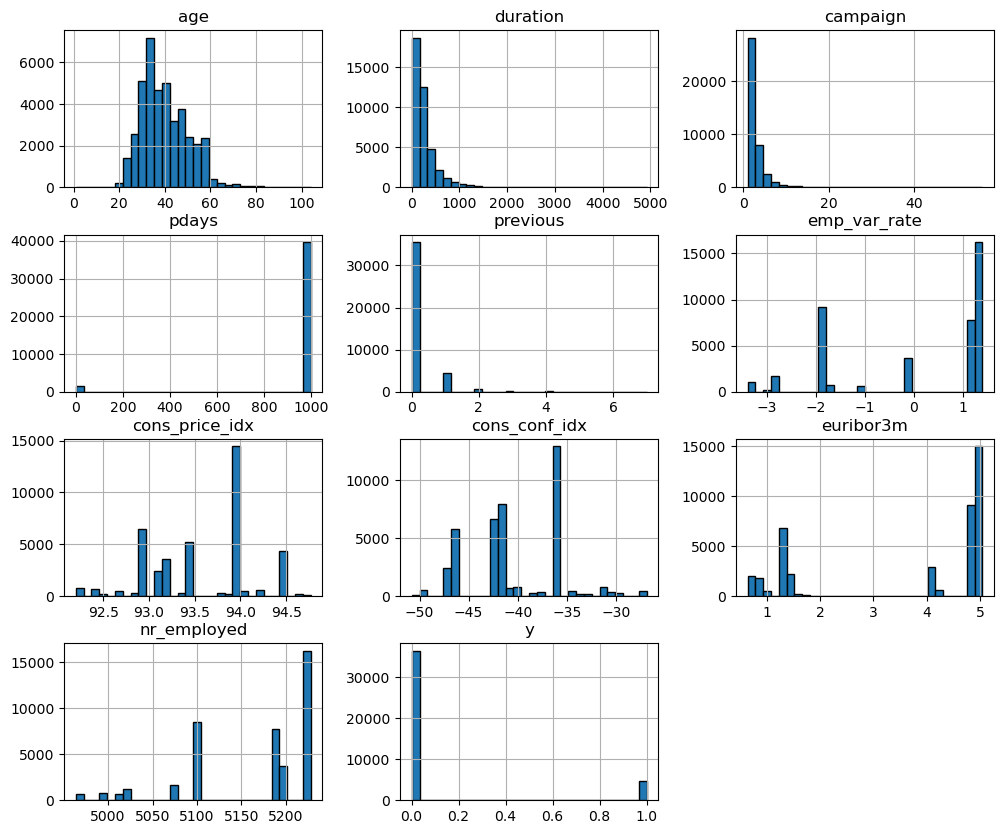

In [8]:
df.hist(figsize=(12, 10), bins=30, edgecolor = 'black')

In [9]:
df['job'].value_counts()

job
admin.           10425
blue-collar       9254
technician        6746
services          3970
management        2924
retired           1721
entrepreneur      1456
self-employed     1421
housemaid         1061
unemployed        1014
student            877
unknown            330
Name: count, dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41185,42.0,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48.0,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41188,25.0,student,single,high.school,no,no,no,NaN,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
41189,103.0,technician,married,high.school,no,no,n,NaN,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,1
41190,29.0,technician,single,Basic,no,yes,n,NaN,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
41191,44.0,services,married,high.school,unknown,yes,y,NaN,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
41192,39.0,admin.,married,university.degree,no,no,y,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
41193,1.0,admin.,married,high.school,no,yes,y,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
41195,2.0,housemaid,married,Basic,unknown,no,n,NaN,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41196,3.0,admin.,single,university.degree,unknown,yes,y,NaN,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
df= df.dropna()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,24.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
41183,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41187,25.0,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp_var_rate'}>],
       [<Axes: title={'center': 'cons_price_idx'}>,
        <Axes: title={'center': 'cons_conf_idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr_employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

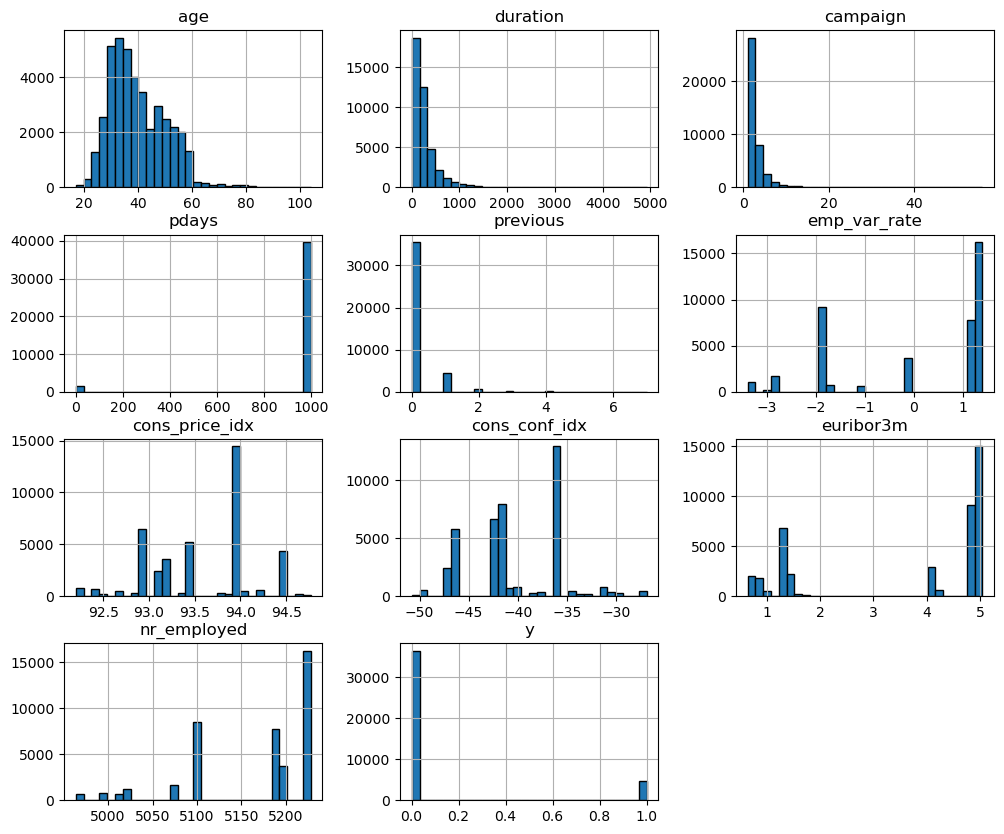

In [12]:
df.hist(figsize=(12, 10), bins=30, edgecolor = 'black')

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41187 entries, 0 to 41194
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41187 non-null  float64
 1   job             41187 non-null  object 
 2   marital         41187 non-null  object 
 3   education       41187 non-null  object 
 4   default         41187 non-null  object 
 5   housing         41187 non-null  object 
 6   loan            41187 non-null  object 
 7   contact         41187 non-null  object 
 8   month           41187 non-null  object 
 9   day_of_week     41187 non-null  object 
 10  duration        41187 non-null  float64
 11  campaign        41187 non-null  int64  
 12  pdays           41187 non-null  int64  
 13  previous        41187 non-null  int64  
 14  poutcome        41187 non-null  object 
 15  emp_var_rate    41187 non-null  float64
 16  cons_price_idx  41187 non-null  float64
 17  cons_conf_idx   41187 non-null  floa

In [15]:
df['job'].value_counts()

job
admin.           10421
blue-collar       9254
technician        6742
services          3969
management        2924
retired           1721
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [16]:
df['marital'].value_counts()

marital
married     24928
single      11567
divorced     4612
unknown        80
Name: count, dtype: int64

In [17]:
df['education'].value_counts()

education
university.degree      12167
high.school             9516
basic.9y                6045
professional.course     5242
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [18]:
df['default'].value_counts()

default
no         32587
unknown     8597
yes            3
Name: count, dtype: int64

In [19]:
df['loan'].value_counts()

loan
no         33950
yes         6247
unknown      990
Name: count, dtype: int64

In [20]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15043
Name: count, dtype: int64

In [21]:
df['month'].value_counts()

month
may    13768
jul     7174
aug     6178
jun     5319
nov     4101
apr     2632
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [22]:
df['poutcome'].value_counts()

poutcome
nonexistent    35562
failure         4252
success         1373
Name: count, dtype: int64

In [23]:
#Define functons to remove outliers
#outliers in the duration and campaign columns were removed

def drop_outlier(data, var):
    q1, q3 = np.percentile(data[var], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[data[var]< upper]
    data = data[data[var]> lower]
    data.reset_index(drop = True, inplace = True)
    return data

In [24]:
df_duration = drop_outlier(df, 'duration')
df_duration

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,24.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
38220,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
38221,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
38222,25.0,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


<Axes: >

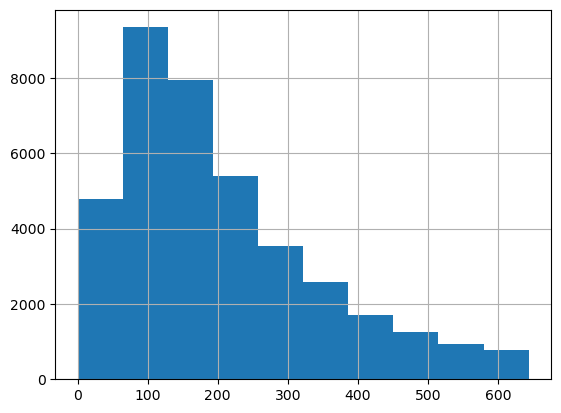

In [25]:
df_duration['duration'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x15a9ba108d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15a9bf76dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a9c393050>],
 'medians': [<matplotlib.lines.Line2D at 0x15a9bf77f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a9bf76b10>],
 'means': []}

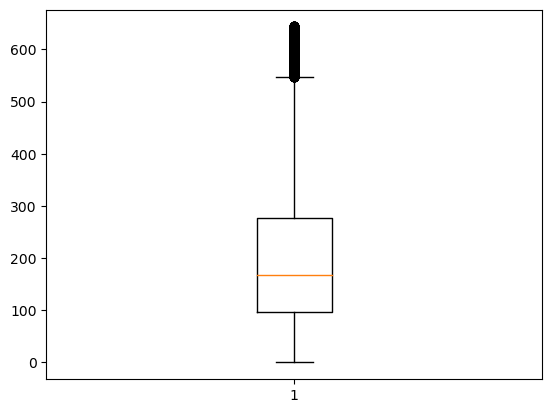

In [26]:
plt.boxplot(df_duration['duration'])

In [27]:
df_campaign = drop_outlier(df, 'campaign')
df_campaign

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37797,24.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
37798,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
37799,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
37800,25.0,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


<Axes: >

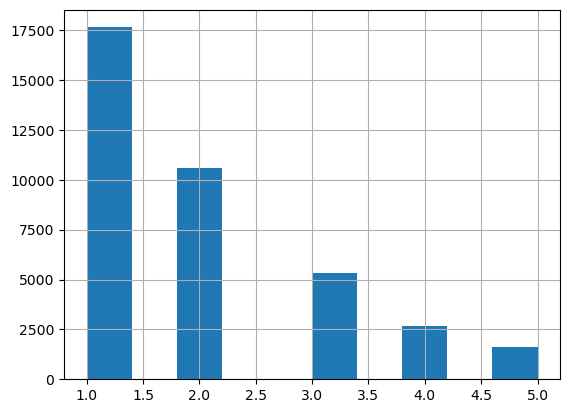

In [28]:
df_campaign['campaign'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x15a9bae8090>,
 'caps': [<matplotlib.lines.Line2D at 0x15a9c06e950>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a9c06cc90>],
 'medians': [<matplotlib.lines.Line2D at 0x15a9c06f810>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a9c0780d0>],
 'means': []}

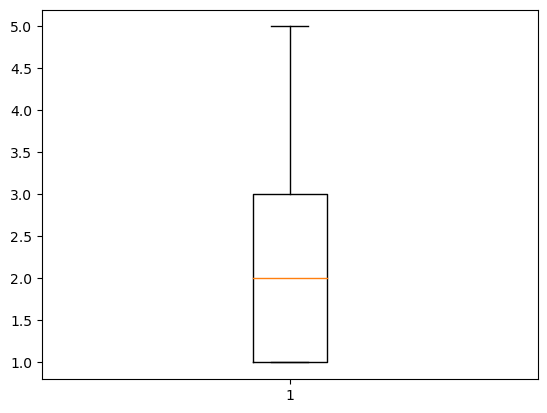

In [29]:
plt.boxplot(df_campaign['campaign'])

In [30]:
df_age = drop_outlier(df, 'age')
df_age

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40712,39.0,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
40713,24.0,admin.,married,high.school,no,yes,no,cellular,may,thu,...,4,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,0
40714,59.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
40715,31.0,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0


<Axes: >

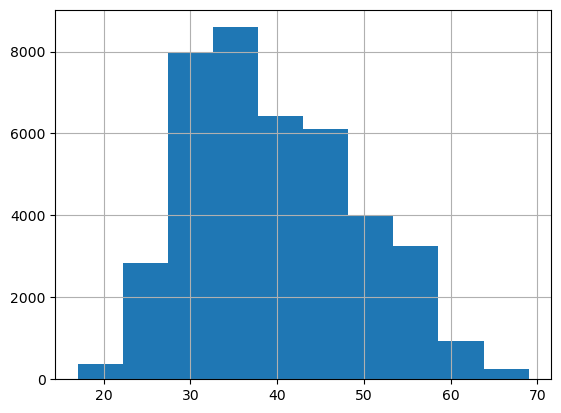

In [31]:
df_age['age'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x15a9c6ac250>,
 'caps': [<matplotlib.lines.Line2D at 0x15a9c6ad4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15a9c6a7950>],
 'medians': [<matplotlib.lines.Line2D at 0x15a9c6ae5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15a9c676e90>],
 'means': []}

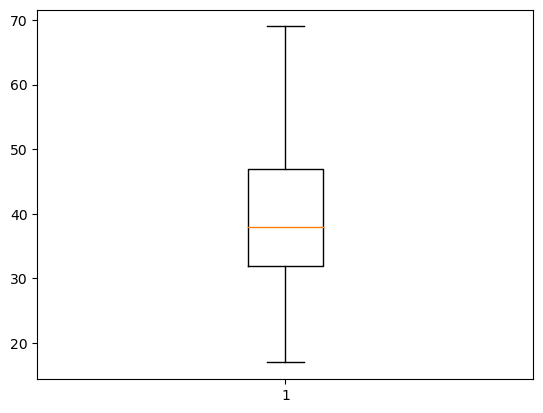

In [32]:
plt.boxplot(df_age['age'])

In [33]:
df_age_y = df_age['age'][df_age['y']==1].value_counts().to_frame().reset_index()
df_age_y

,age,count
0,31.0,220
1,33.0,210
2,30.0,202
3,29.0,186
4,32.0,184
5,34.0,184
6,35.0,167
7,36.0,154
8,28.0,151
9,38.0,143


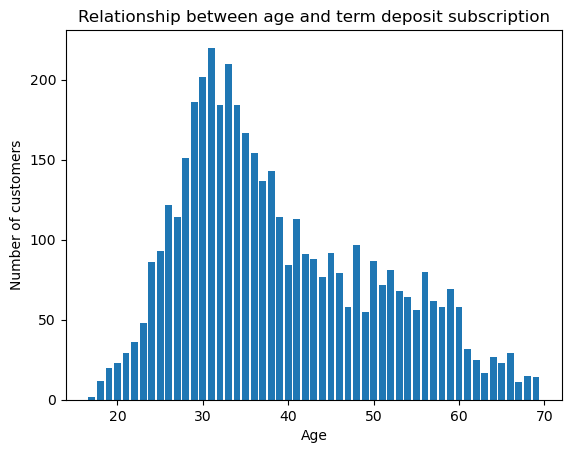

In [34]:
y = df_age_y['count']
x = df_age_y['age']

plt.bar(x, y)
plt.title('Relationship between age and term deposit subscription')
plt.ylabel('Number of customers')
plt.xlabel('Age')
plt.show()
#More customers between the age of 25 and 40 subscribed to term deposit.

In [35]:
#Seeking the relationship between marital status and those who subscribed to term deposit
df_marital = df['marital'][df['y']==1].value_counts().to_frame().reset_index()
df_marital

,marital,count
0,married,2532
1,single,1620
2,divorced,476
3,unknown,12


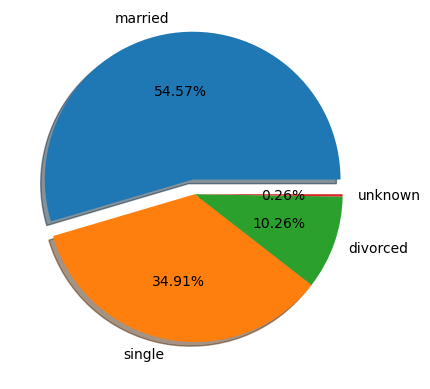

In [36]:
#Pie Chart Showing the relationship between marital status and those who subscribed to term deposit
y = df_marital['count']
x = df_marital['marital']
plt.pie(y, labels=x, explode= [0.1, 0, 0, 0], autopct= '%1.2f%%', shadow = True)

plt.show()
#More married people subscribed to the term deposit.

In [37]:
#Seeking the relationship between education and those who subscribed to term deposit
df_education = df['education'][df['y']==1].value_counts().to_frame().reset_index()
df_education 

,education,count
0,university.degree,1670
1,high.school,1031
2,professional.course,595
3,basic.9y,473
4,basic.4y,428
5,unknown,251
6,basic.6y,188
7,illiterate,4


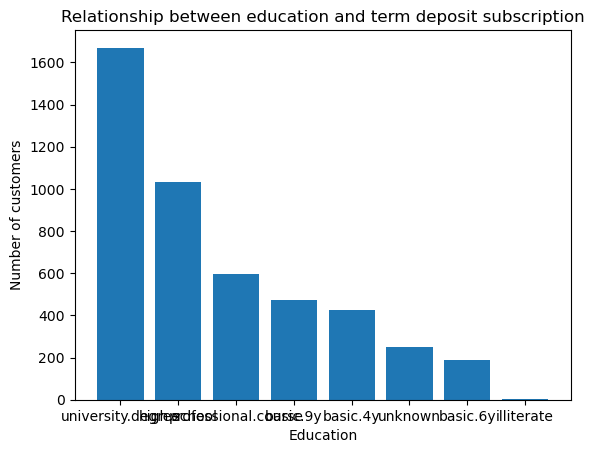

In [38]:
#Barchart showing the relationship between education and those who subscribed to term deposit
y = df_education['count']
x = df_education['education']

plt.bar(x, y)
plt.title('Relationship between education and term deposit subscription')
plt.ylabel('Number of customers')
plt.xlabel('Education')
plt.show()
#More people with university degree subscribed for term dposit

In [39]:
#Seeking the relationship between those who defaulted in other loans and those who subscribed to term deposit
df_default = df['default'][df['y']==1].value_counts().to_frame().reset_index()
df_default 

,default,count
0,no,4197
1,unknown,443


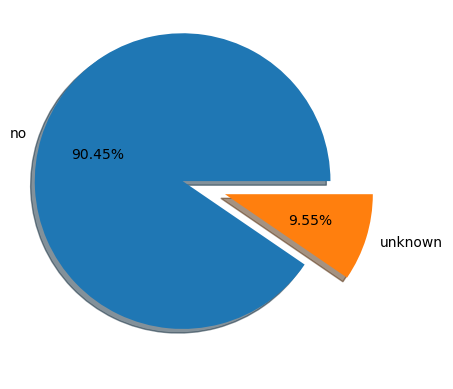

In [40]:
#Pie Chart Showing the relationship between those who defaulted in other loans and those who subscribed to term deposit
y = df_default['count']
x = df_default['default']
plt.pie(y, labels=x, explode= [0.3, 0], autopct= '%1.2f%%', shadow = True)

plt.show()
#Customer's that did not default in loan repayments had access to term deposit subscripton

In [41]:
df_housing = df['housing'][df['y']==1].value_counts().to_frame().reset_index()
df_housing 
#people with housing loans also subscribed to term deposit

,housing,count
0,yes,2507
1,no,2026
2,unknown,107


In [42]:
df_loan = df['loan'][df['y']==1].value_counts().to_frame().reset_index()
df_loan
#More people without personal loans had access to term deposit subscription.

,loan,count
0,no,3850
1,yes,683
2,unknown,107
